#### MLR without dropping a dummy variable

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('50_Startups.csv')
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = ct.fit_transform(X)

In [7]:
X[:5, :]

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05]])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=1)

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [11]:
reg.coef_[0], reg.coef_[1], reg.coef_[1]

(-285.1777694624035, 297.56087645952425, 297.56087645952425)

In [8]:
reg.coef_, reg.intercept_

(array([-2.85177769e+02,  2.97560876e+02, -1.23831070e+01,  7.74342081e-01,
        -9.44369585e-03,  2.89183133e-02]),
 49834.885073226884)

In [9]:
y_pred = reg.predict(X_test)

In [10]:
J = sum((y_pred - Y_test)**2)

In [11]:
J

794954415.0413755

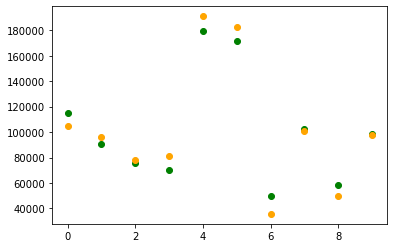

In [12]:
plt.scatter(list(range(10)),y_pred, c='green')
plt.scatter(list(range(10)),Y_test, c='orange')
plt.show()

In [12]:
# same results with and without dummy variables trap (multicollinearity). maybe because the dataset is so small that
#there is no significant change in the regression model.